In [ ]:
import blochK
print(blochK.__version__)



0.1.0


In [60]:
np.array([1,2,3]).ndim

1

In [61]:
import numpy as np
from blochK.hamiltonian import Hamiltonian2D, BrillouinZone2D
from blochK.hamiltonian_testing import Hamiltonian0


def test_sampleBZ():
    Lk = 5
    BZ = BrillouinZone2D()
    ks = BZ.sample(Lk)

    [i, j] = np.random.randint(0,Lk-1,size=(2))
    m1_mini = ks[:,i+1,j] - ks[:,i,j]
    m2_mini = ks[:,i,j+1] - ks[:,i,j]
    A_mini = np.abs(m1_mini[0]*m2_mini[1] - m1_mini[1]*m2_mini[0])
    assert np.isclose(A_mini*Lk**2, BZ.area), "Brillouin zone incorrectly sampled"

    # plt.scatter(*ks)
    # plt.scatter(ks[0]+BZ.m1[0],ks[1]+BZ.m1[1])
    # plt.scatter(ks[0]+BZ.m2[0],ks[1]+BZ.m2[1])

def test_init_Hamiltonian2D():
    H = Hamiltonian2D(Hamiltonian0, n1=np.array([1,0]), n2=np.array([0,1]))  # empty Hamiltonian2D object for testing

    #check brillouin zone correctly defined
    assert np.allclose(H.BZ.m1, 2*np.pi*np.array([1,0]))
    assert np.allclose(H.BZ.m2, 2*np.pi*np.array([0,1]))

    #add operator
    H.add_operator('sz', np.array([[1,0],[0,-1]]))
    assert np.allclose(H.operator.sz, np.array([[1,0],[0,-1]])), "Operator not correctly added"
    H.add_operator('spin', np.array([1,-1]))
    assert np.allclose(H.operator.spin, np.array([1,-1])), "Operator not correctly added"


test_init_Hamiltonian2D()

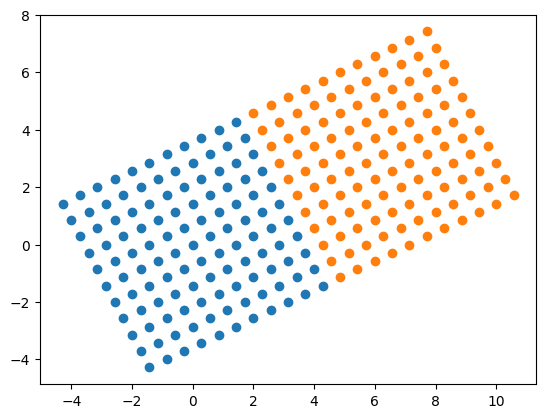

In [ ]:
import matplotlib.pyplot as plt
Lk = 11
epsilon = 1/Lk
m1 = np.array([2*pi,pi])
m2 = np.array([pi,-2*pi])


plt.scatter(*ks)

plt.scatter(ks[0]+2*np.pi,ks[1]+np.pi)

In [38]:
#defines a Hamiltonian solely for testing purposes

import numpy as np
from numpy import pi,cos,sin,exp

#operators
Spin_operator = np.array([1,-1]) #spin up +1, spin down -1

#Definitions for the Square lattice
#lattice vectors
n1 = np.array([1,0])
n2 = np.array([0,1])

# Area of unit cell (2D cross product)
A = n1[0]*n2[1] - n1[1]*n2[0]
#reciprocal lattice vectors
m1 = 2*np.pi/A * np.array([n2[1], -n2[0]])
m2 = 2*np.pi/A * np.array([-n1[1], n1[0]])

# Define High symmetry points in BZ
points_BZ = {
    "\Gamma": [0,0],
    "X": [1,0],
    "Y": [0,1],
    "R": [1,1],
    "R'": [1,-1],
    "-R": [-1,1],
    "-R'": [-1,-1]
}


def Hamiltonian0(kx,ky,t=1,mu=-1): 
    """
    Simple 2D square lattice tight-binding model with NN hopping and chemical potential.
    t: NN hopping
    mu: chemical potential
    """
    Hk = np.zeros((2,2,*kx.shape),dtype=complex) #Basis (up,down)

    #set hamiltonian structure
    Hk[0,0] = -2*t*cos(kx) - 2*t*cos(ky) - mu

    #make hermitian
    Hk[1,0] = np.conjugate(Hk[0,1])

    #spin degenerate
    Hk[1:,1:] = Hk[:1,:1]

    return Hk


# Create Hamiltonian2D object
Htest = Hamiltonian2D(Hamiltonian0, basis=['up','down'])

ValueError: cannot reshape array of size 3 into shape (2,)

0.06314300089267522


(1.5, 2.5)

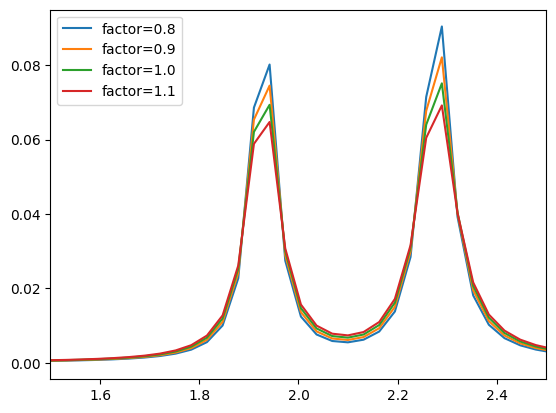

In [47]:
from blochK.hamiltonian_testing import create_Hsquare
import numpy as np
from numpy import pi,cos,sin,exp
import matplotlib.pyplot as plt

#finding the right Gamma for a given Lq
Lq = 200

H = create_Hsquare()
H.set_params(dict(t=1,mu=-1,m=0.3))

# Define the k-point grid
kxs = np.linspace(-pi,pi,Lq)
kys = kxs*0
#Diagonalize Hamiltonian
es,psis = H.diagonalize(kxs,kys)

des_y = np.roll(es, 1, axis=1) - es
des = np.abs([des_y]).flatten()
des0 = des.max()
print(des.max())

factors = [0.8,0.9,1.,1.1]



for fac in factors:
    
    
    Gamma = des.max() * fac

    Ak = np.sum(Gamma/(es**2+Gamma**2),axis=(0))/Lq


    plt.plot(kxs,Ak,label='factor='+str(fac))

plt.legend()
plt.xlim(1.5,2.5)

0.06314300089267566
Using Gamma =  0.05051440071414053
Using Gamma =  0.05682870080340809
Using Gamma =  0.06314300089267566
Using Gamma =  0.06945730098194323


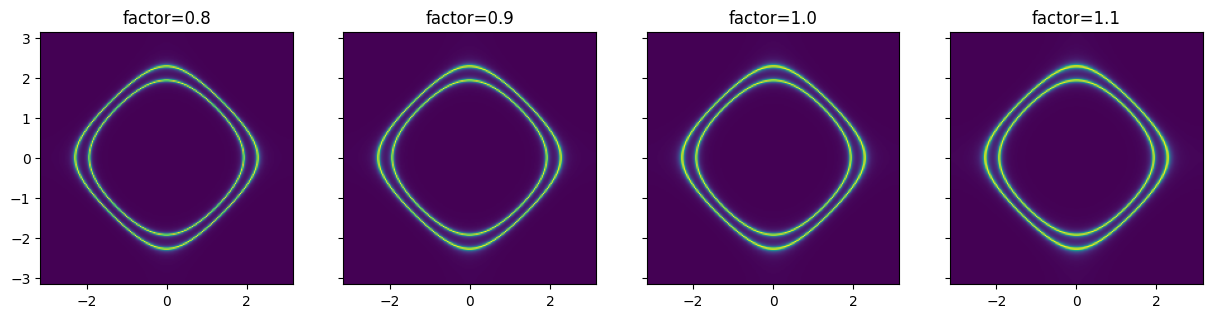

In [49]:
from blochK.plotting.utils import extent, sample_square #for getting the correct extent

ks = sample_square(Lq)

es,psis = H.diagonalize(*ks)

des_x = np.roll(es, 1, axis=2) - es
des_y = np.roll(es, 1, axis=1) - es
des = np.abs([des_x, des_y]).flatten()
des0 = des.max()
print(des0)


fig,axs = plt.subplots(1,len(factors),figsize=(15,5),sharey=True)

for fac,ax in zip(factors,axs):
    ax.set_title('factor='+str(fac))
    Gamma = des0 * fac
    print('Using Gamma = ',Gamma)
    Ak = np.sum(Gamma/(es**2+Gamma**2),axis=(0))/Lq**2

    ax.imshow(Ak,extent=extent(ks),origin='lower')

    #ax.set_xlim(1,2.5)
    #ax.set_ylim(-1,1)


In [ ]:
def find_Gamma(es, weighting_factor=0.8):
    des_x = np.roll(es, 1, axis=2) - es
    des_y = np.roll(es, 1, axis=1) - es
    des = np.abs([des_x, des_y]).flatten()
    des0 = des.max()
    return des0 * weighting_factor